# Load the dataset from directories

In [1]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../data/train",  # update path
    label_mode="categorical",  # one-hot encode automatically
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="training",
    seed=42
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../data/train",
    label_mode="categorical",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    validation_split=0.2,
    subset="validation",
    seed=42
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../data/test",
    label_mode="categorical",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 11200 files belonging to 14 classes.
Using 8960 files for training.
Found 11200 files belonging to 14 classes.
Using 2240 files for validation.
Found 2800 files belonging to 14 classes.


# Visualize sample images

Classes: ['0', '1', '10', '11', '12', '13', '2', '3', '4', '5', '6', '7', '8', '9']


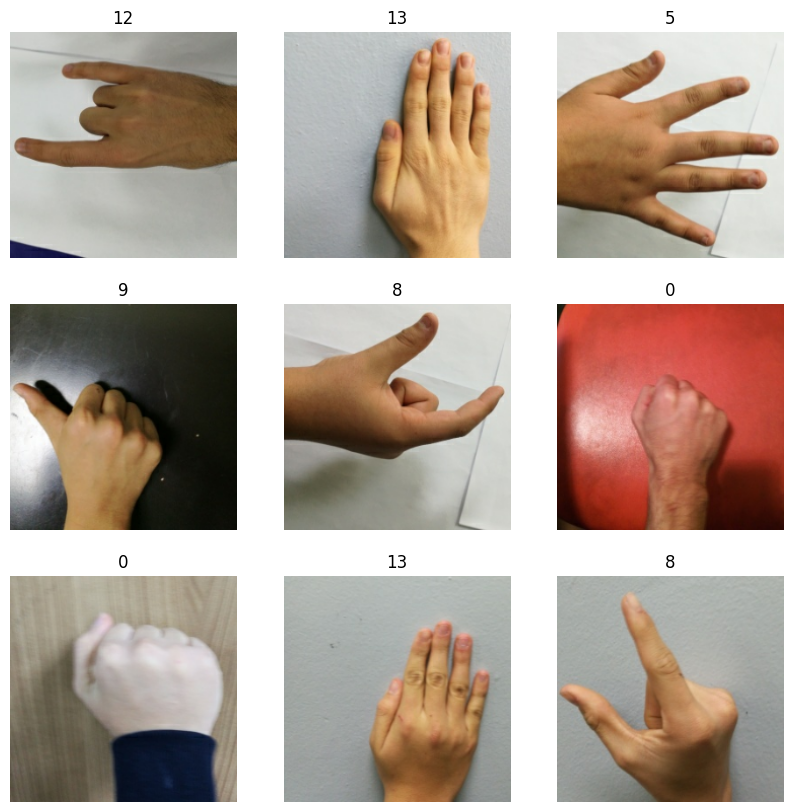

In [2]:
import matplotlib.pyplot as plt

class_names = train_ds.class_names
print("Classes:", class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i])])
        plt.axis("off")

# Visualize Class Balance

Extracting labels from dataset...


C:\Users\USER\AppData\Local\Temp\ipykernel_7940\624273787.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_labels, palette="icefire")


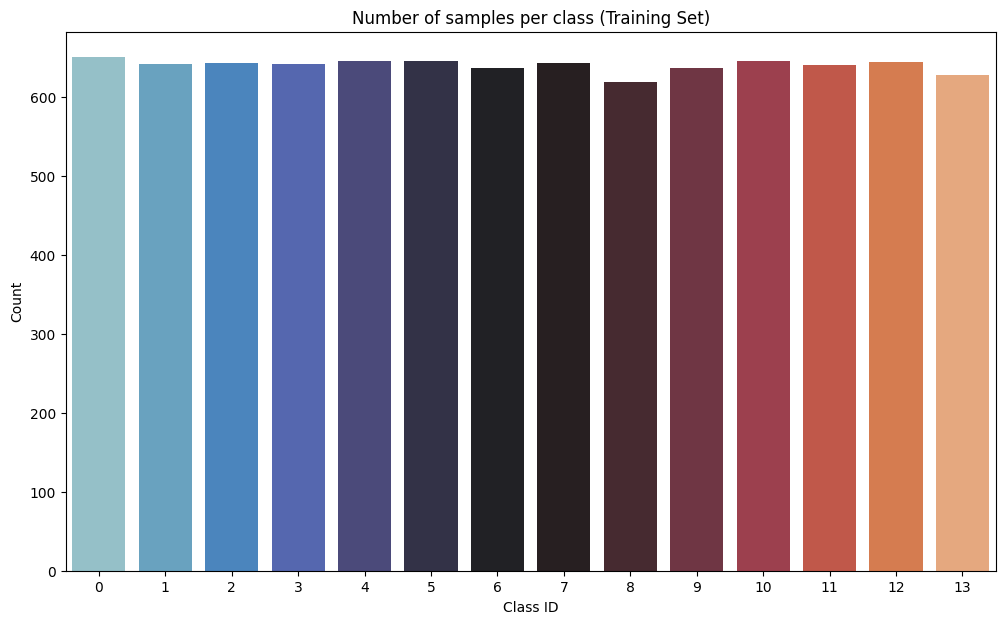

Counts per class: {0: 650, 1: 641, 2: 643, 3: 641, 4: 646, 5: 646, 6: 636, 7: 643, 8: 619, 9: 637, 10: 646, 11: 640, 12: 644, 13: 628}


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# 1. Create a list to hold all labels
y_train_labels = []

# 2. Iterate through the dataset to extract labels
# unbatch() breaks the batches of 32 down into single images so we can count them
print("Extracting labels from dataset...")
for images, labels in train_ds.unbatch():
    # 'labels' is one-hot encoded (e.g., [0, 0, 1, 0...]) because of label_mode='categorical'
    # argmax converts it back to a single integer (e.g., 2)
    y_train_labels.append(tf.argmax(labels).numpy())

# Convert to a numpy array for easy counting
y_train_labels = np.array(y_train_labels)

# 3. Visualize (Similar to your tutorial)
plt.figure(figsize=(12, 7))
sns.countplot(x=y_train_labels, palette="icefire")
plt.title("Number of samples per class (Training Set)")
plt.xlabel("Class ID")
plt.ylabel("Count")
plt.show()

# 4. Print exact numbers
unique, counts = np.unique(y_train_labels, return_counts=True)
print("Counts per class:", dict(zip(unique, counts)))

# Normalize images

In [ ]:
from tensorflow.keras import layers, models, optimizers

model = models.Sequential()

# --- Preprocessing ---
# Rescale pixel values from [0, 255] to [0, 1]
model.add(layers.Rescaling(1./255, input_shape=(224, 224, 3)))

# --- Block 1 ---
# 2 Convolutional layers with 64 filters
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# --- Block 2 ---
# 2 Convolutional layers with 128 filters
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# --- Block 3 ---
# 4 Convolutional layers with 256 filters
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# --- Block 4 ---
# 4 Convolutional layers with 512 filters
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# --- Block 5 ---
# 4 Convolutional layers with 512 filters
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

# --- Classification Head (Dense Layers) ---
model.add(layers.Flatten())

# Original VGG uses 4096 neurons, but that is very heavy for personal computers.
# We will use 1024 or 512 to prevent your session from crashing, 
# but strictly speaking, "from scratch" usually implies 4096. 
# Let's try 4096 first, but if you get an OOM (Out of Memory) error, reduce this number.
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5)) # Helps prevent overfitting

model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))

# Output Layer: 14 neurons for the 14 gestures
model.add(layers.Dense(14, activation='softmax'))


model.summary()

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 139,627,598 (532.64 MB)

 Trainable params: 139,627,598 (532.64 MB)

 Non-trainable params: 0 (0.00 B)

# Compiling and Training

In [ ]:
# Compile
model_vgg.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001), # Low learning rate for deep networks
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train
epochs = 15 # Start with 15, you can increase later
history = model_vgg.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/15
  3/280 ━━━━━━━━━━━━━━━━━━━━ 2:22:46 31s/step - accuracy: 0.0799 - loss: 2.6392